In [1]:
import pandas as pd

df = pd.read_csv("/kaggle/input/safebooru-2018/safebooru-metadata-2018.csv")

# Drop unnecessary row

In [2]:
df = df.drop(["id","creator_id","created_at","source"], axis=1)

In [3]:
print(df.columns)

Index(['width', 'height', 'tags', 'file_url'], dtype='object')


# Take only the top 2000 tag

In [4]:
exploded = df["tags"].str.split().explode(ignore_index=True)

tag_counts = exploded.value_counts()

print("Total unique tags:", tag_counts.shape[0])

print(tag_counts.head(20))

Total unique tags: 370058
tags
solo                 1065723
long_hair             986629
1girl                 964609
highres               765789
short_hair            654267
smile                 653177
blush                 513569
touhou                478213
looking_at_viewer     458319
open_mouth            455805
blue_eyes             439560
blonde_hair           438846
multiple_girls        423033
brown_hair            411911
breasts               410356
skirt                 403977
hat                   397732
black_hair            346477
red_eyes              343779
dress                 309028
Name: count, dtype: int64


In [5]:
top_2000_tags = set(tag_counts.head(2000).index)

df["tags_filtered"] = (
    df["tags"]
    .str.split()
    .apply(lambda tags: [t for t in tags if t in top_2000_tags])
)

df["tags"] = df["tags_filtered"].str.join(" ")

In [6]:
exploded = df["tags"].str.split().explode(ignore_index=True)

tag_counts = exploded.value_counts()

print("Total unique tags: ", tag_counts.shape[0])

Total unique tags:  2000


# Tags frequency

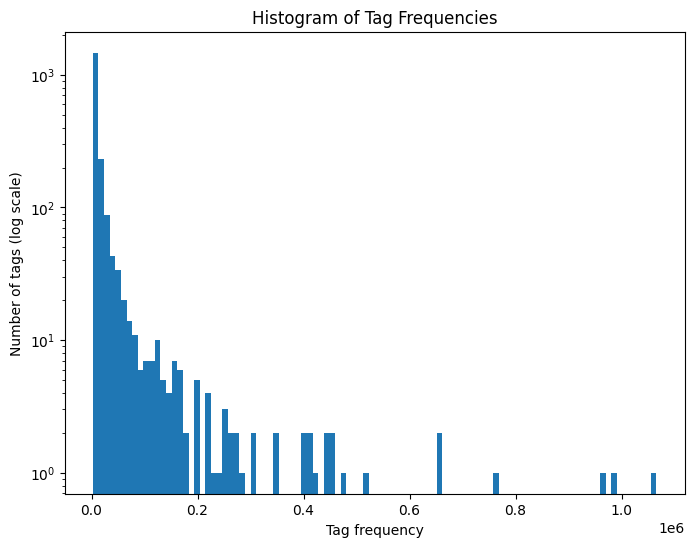

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.hist(tag_counts, bins=100, log=True)
plt.xlabel("Tag frequency")
plt.ylabel("Number of tags (log scale)")
plt.title("Histogram of Tag Frequencies")
plt.show()

- On the left: thousand of tags only appear once or a few times.
- In the middle: fewer tags that appear tens to hundreds of times.
- On the right: a very small number of tags that appear thousands or millions of times

In [8]:
df.to_csv("Anime_Tagging_dataset_processed.csv", index=False)